# Name : Tadele Yednkachw

# Prediction using Supervised ML

# Step 1 : Frame the problem

        1) Since we're given labeled training example we should use supervised learning algorithms.
        2) our trained model should return value thus it is a regression problem.
        3) there is one feature in the data, so it is a simple linear regression problem.
        4) our model output should be a single value, it is a univariate regression problem.
        5) since the dataset is small enough to fit in memeory at once we can use batch learning.

# Step 2 : Select a performance measure
    
        -A performance measure gives us how much error the system typically makes in its prediction.
        -I choose root mean squared error(RMSE), because its typical choice on simple regression problems, and the trainging example does not have an extreme outliers.
       -Root mean squared error is cost function measured on the set of examples using our hypothesis h
       -Explanation on RMSE parameters:
            1) h -our systems prediction function also called hypothesis 
                 -when our system given an instance's feature vector x(i), it outputs y_hat = h(x(i))
                 
            2) X-is a matrix containing all features values without the lables of all instances in the dataset.
            3) x(i) -is a vector of all feature values without the label of the ith instance in the dataset.
            4) m -is the number of instances in the dataset.

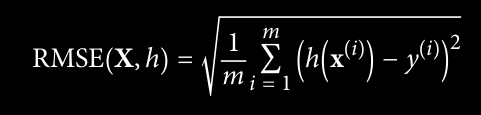

# Step 3 : Get the Data and save it in local system

In [1]:
import requests
import os
import csv
DOWNLOAD_DIRECTORY = "http://bit.ly/w-data"
STUDY_HOURS_PATH = os.path.join("datasets", "task_1")
def fetch_data(DOWNLOAD_DIRECTORY):
    os.makedirs(STUDY_HOURS_PATH, exist_ok=True)
    r = requests.get(DOWNLOAD_DIRECTORY)
    decoded_content = r.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    file_path = os.path.join(STUDY_HOURS_PATH, "study_hours.csv")
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for elt in my_list:
            writer.writerow(elt)
fetch_data(DOWNLOAD_DIRECTORY)

### Now our data is saved under project_folder/datasets/task_1 folder with a name study_hours.csv

# Step 4 : Analyzing the data

In [2]:
import pandas as pd
def load_data(data_path = STUDY_HOURS_PATH):
    csv_path = os.path.join(data_path, "study_hours.csv")
    return pd.read_csv(csv_path)
data = load_data()

In [3]:
data.head() # display the first 5 rows, each row represents one instance

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info() # to get some information about our datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### As we can see above our datasets contains 25 rows and 2 columns 
     - we can see - there is no missing value in the dataset because all 25 rows are not-null
                  - there is 1 feature to get the output
                  - feature and lable datatypes

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Explanation
    count - number of rows in the dataset
    mean - mean of each column example mean(hours) = 1/m(sum(hours)) the same goes to scores
    std - standard deviation which measures how dispersed the values are
    min - minimum value in the columns
    max - maximum value in the columns
    The 25%, 50%, and 75% - rows show the corresponding percentiles. 
    percentile indiates value below which a given percentage of observations in a group of observation fall.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

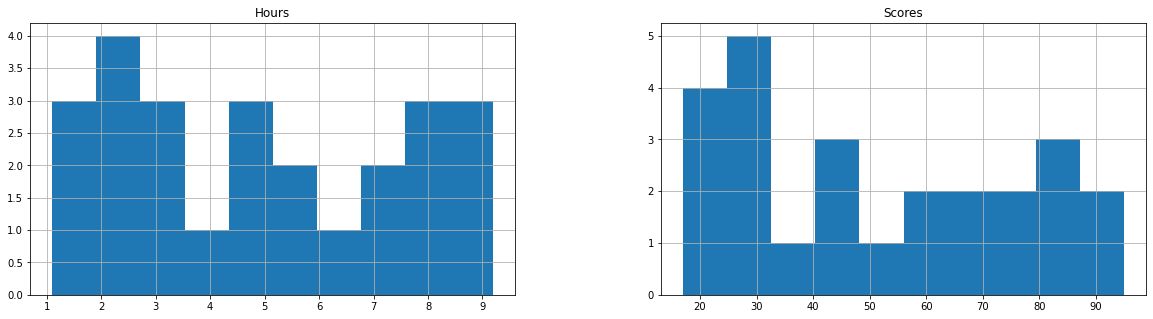

In [7]:
data.hist(bins=10, figsize=(20, 5))
plt.show()

### As the figure show most people study 2-3 hours and most people score 20-30 

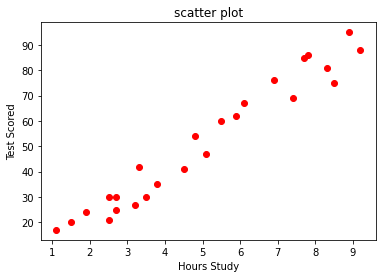

In [8]:
hours = data['Hours']
scores = data['Scores']
plt.scatter(hours, scores, color='r')
plt.xlabel('Hours Study')
plt.ylabel('Test Scored')
plt.title('scatter plot')
plt.show()

### Our goal is to find out the best line which can fit the training example with minimum loss

# Step 5 : Model Fitting
         -finding the best line which minimize our loss
         -since our loss will be determined by RMSE we can fomalize best line by, a line which have the minimum             RMSE from all candidates, so basically we want to minimize RMSE to get the model
         -inorder to minimize RMSE we can use Gradient descent algorithm which is an iterative optimization                 algorithm to find the minimum of a function. Here that function is our Loss Function.

## Since we don't have any missing value in our dataset we don't care about data cleaning

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_data = train_set['Hours']
train_label = train_set['Scores']
test_data = test_set['Hours']
test_label = test_set['Scores']

In [10]:
print("Train set shape : ", train_set.shape)
print("Test set shpape : ", test_set.shape)
print("Training feature shape : ", train_data.shape)
print("Training label shape : ", train_label.shape)
print("Test feature shape : ", test_data.shape)
print("Test label shape : ", test_label.shape)

Train set shape :  (20, 2)
Test set shpape :  (5, 2)
Training feature shape :  (20,)
Training label shape :  (20,)
Test feature shape :  (5,)
Test label shape :  (5,)


### Training the model

In [11]:
import numpy as np
train_data = np.array(train_data).reshape(-1, 1)
train_labels = np.array(train_label).reshape(-1, 1)
test_data = np.array(test_data).reshape(-1, 1)
test_labels = np.array(test_label).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [[9.68207815]]


### We only have 1 feature which is hours of study per day, so our model should have 1 parameter which it can tweak thus our model's degree of freedom is 1.

### Testing the model

In [12]:
print("Prediction : ", list(lin_reg.predict(test_data)))
print("Actual Values : ", list(test_labels))

Prediction :  [array([83.18814104]), array([27.03208774]), array([27.03208774]), array([69.63323162]), array([59.95115347])]
Actual Values :  [array([81]), array([30]), array([21]), array([76]), array([62])]


### As we can see our model predict close values to the actual output

### Evaluating the model

In [13]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(test_data)
lin_mse = mean_squared_error(test_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.352380006653288

### The distance between actual value to predicted one is 4.35 which is some how a good estimation

In [14]:
from sklearn.metrics import r2_score
score = r2_score(test_labels, predictions)
score

0.9678055545167994

In [15]:
print("Accuracy percentage : ", round(score * 100, 2 ))

Accuracy percentage :  96.78


### R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

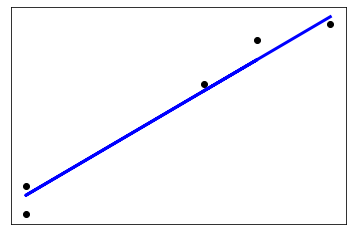

In [16]:
plt.scatter(test_data, test_labels,  color='black')
plt.plot(test_data, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
predict = lin_reg.predict(np.array([9.25]).reshape(-1, 1))
score = round(float(predict[0]), 2)
print(score)
print("If a student studies 9.25 hrs/day they will get : ",score , " in their scores")

92.39
If a student studies 9.25 hrs/day they will get :  92.39  in their scores


# Thank you!